In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ayan0\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\ayan0\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
# Load the Excel file
file_path = 'Output.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')


In [3]:
# Ensure all entries in the 'Content' column are strings and handle NaN values
df['Content'] = df['Content'].astype(str).fillna('')


In [4]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()


In [5]:
# Apply VADER sentiment analysis to each content
df['VADER_Sentiment'] = df['Content'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])


In [6]:
# Define function to classify VADER sentiment
def classify_vader_sentiment(compound):
    if compound <= -0.6:
        return 'Very Negative'
    elif -0.6 < compound <= -0.2:
        return 'Negative'
    elif -0.2 < compound < 0:
        return 'Slightly Negative'
    elif compound == 0:
        return 'Neutral'
    elif 0 < compound <= 0.2:
        return 'Slightly Positive'
    elif 0.2 < compound <= 0.6:
        return 'Positive'
    else:
        return 'Very Positive'


In [7]:
# Classify VADER sentiment
df['VADER_Sentiment_Class'] = df['VADER_Sentiment'].apply(classify_vader_sentiment)


In [8]:
# Display the resulting dataframe with VADER sentiment scores
print(df.head())


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  VADER_Sentiment  \
0  We have seen a huge development and dependence...           0.9922   
1  Throughout history, from the industrial revolu...           0.9993   
2  Introduction In the span of just a few decades...           0.9971   
3  The way we live, work, and communicate has unq...          -0.9947   
4  The year 2040 is poised to witness a continued...           0.9952   

  VADER_Sentiment_Class  
0         Very Positive  
1         Very Positive  
2         Very Positive  
3         Very Negative  
4         Very Positive  


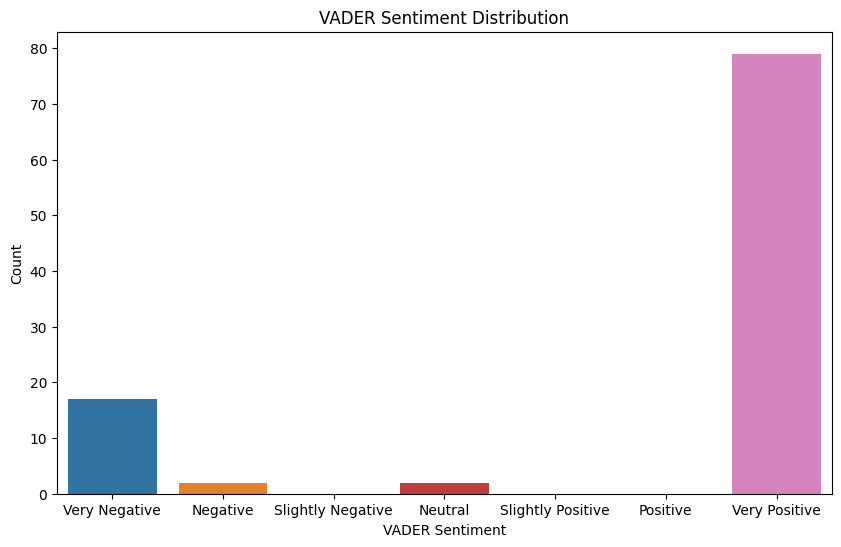

In [9]:
# Plot VADER sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VADER_Sentiment_Class', order=['Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive'])
plt.title('VADER Sentiment Distribution')
plt.xlabel('VADER Sentiment')
plt.ylabel('Count')
plt.show()


In [10]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from transformers import TFBertForSequenceClassification, BertTokenizer

# Load pre-trained BERT model and tokenizer for sentiment analysis
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)


C:\Users\ayan0\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\ayan0\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [15]:
# Function to perform BERT sentiment analysis using TensorFlow
def bert_sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding=True, max_length=512)
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=-1)
    label = tf.argmax(probs, axis=-1).numpy()[0]
    return label, probs[0][label].numpy()


In [17]:
import tensorflow as tf

In [18]:
# Apply BERT sentiment analysis to each content
df['BERT_Sentiment'], df['BERT_Sentiment_Score'] = zip(*df['Content'].apply(bert_sentiment_analysis))


In [19]:
# Define function to classify BERT sentiment
def classify_bert_sentiment(label):
    if label == 0:
        return 'Very Negative'
    elif label == 1:
        return 'Negative'
    elif label == 2:
        return 'Neutral'
    elif label == 3:
        return 'Positive'
    elif label == 4:
        return 'Very Positive'


In [20]:
# Classify BERT sentiment
df['BERT_Sentiment_Class'] = df['BERT_Sentiment'].apply(classify_bert_sentiment)


In [21]:
# Display the resulting dataframe with BERT sentiment scores
print(df.head())


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  VADER_Sentiment  \
0  We have seen a huge development and dependence...           0.9922   
1  Throughout history, from the industrial revolu...           0.9993   
2  Introduction In the span of just a few decades...           0.9971   
3  The way we live, work, and communicate has unq...          -0.9947   
4  The year 2040 is poised to witness a continued...           0.9952   

  VADER_Sentiment_Class  BERT_Sentiment  BERT_Sentiment_Score  \
0         Very Positive               3              0.377593   
1         Very Positive               4              0.557232   
2         Very Positive      

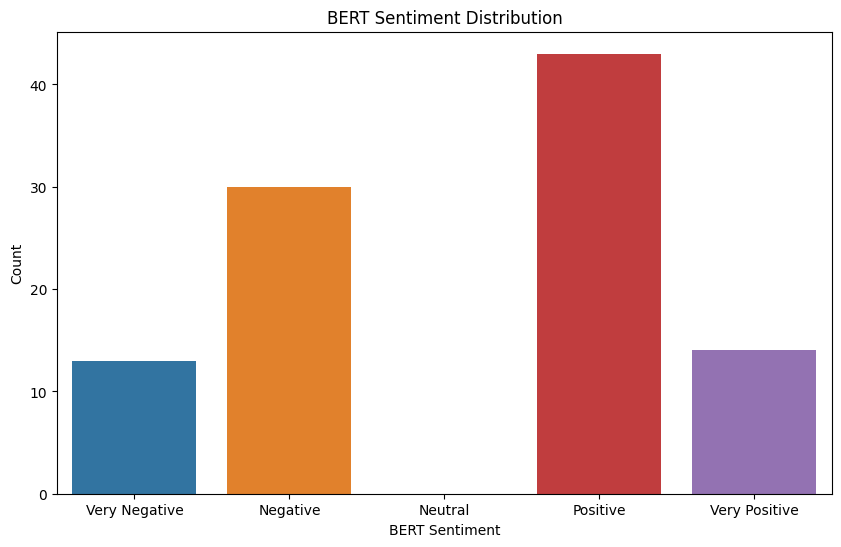

In [22]:
# Plot BERT sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BERT_Sentiment_Class', order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
plt.title('BERT Sentiment Distribution')
plt.xlabel('BERT Sentiment')
plt.ylabel('Count')
plt.show()


In [23]:
# Function to plot a pie chart
def plot_pie_chart(data, column, title):
    sentiment_counts = data[column].value_counts()
    labels = sentiment_counts.index
    sizes = sentiment_counts.values
    colors = sns.color_palette('pastel')[0:len(labels)]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()


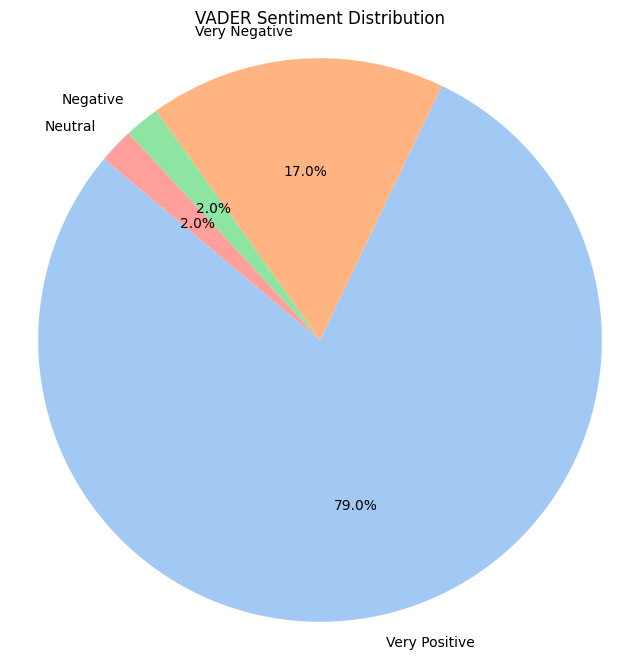

In [24]:
# Plot VADER sentiment distribution as a pie chart
plot_pie_chart(df, 'VADER_Sentiment_Class', 'VADER Sentiment Distribution')


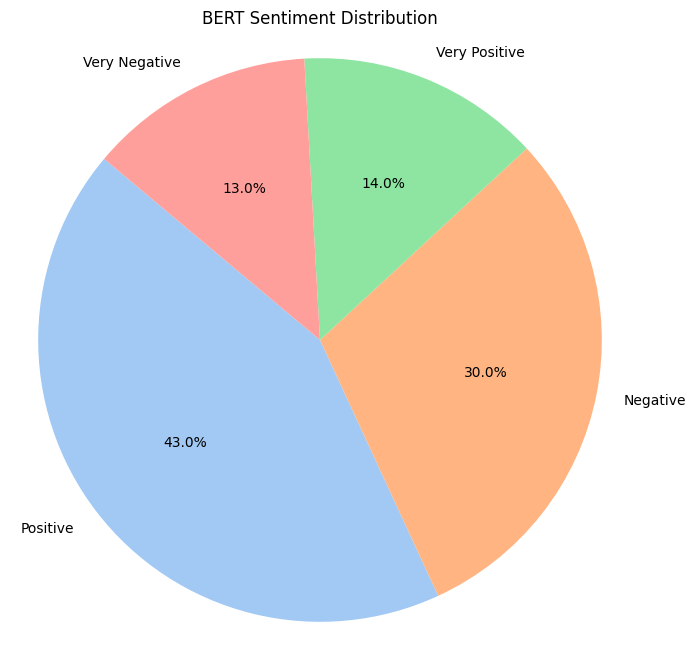

In [25]:
# Plot BERT sentiment distribution as a pie chart
plot_pie_chart(df, 'BERT_Sentiment_Class', 'BERT Sentiment Distribution')


In [26]:
from transformers import pipeline


In [27]:
# Load BERT sentiment pipeline
sentiment_pipeline = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\ayan0\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ayan0\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [29]:
# Apply BERT sentiment analysis to each content with proper handling of sequence length
def bert_sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding='max_length', max_length=512)
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=-1)
    label = tf.argmax(probs, axis=-1).numpy()[0]
    return label, probs[0][label].numpy()

# Apply BERT sentiment analysis to each content
df['BERT_Sentiment'], df['BERT_Sentiment_Score'] = zip(*df['Content'].apply(bert_sentiment_analysis))


In [30]:
# Display the resulting dataframe with BERT pipeline sentiment scores
print(df.head())


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  VADER_Sentiment  \
0  We have seen a huge development and dependence...           0.9922   
1  Throughout history, from the industrial revolu...           0.9993   
2  Introduction In the span of just a few decades...           0.9971   
3  The way we live, work, and communicate has unq...          -0.9947   
4  The year 2040 is poised to witness a continued...           0.9952   

  VADER_Sentiment_Class  BERT_Sentiment  BERT_Sentiment_Score  \
0         Very Positive               3              0.377593   
1         Very Positive               4              0.557232   
2         Very Positive      

In [31]:
# Define function to classify BERT pipeline sentiment
def classify_bert_pipeline_sentiment(label):
    if label == 'NEGATIVE':
        return 'Negative'
    elif label == 'POSITIVE':
        return 'Positive'
    else:
        return 'Neutral'


In [33]:
# Function to perform BERT sentiment analysis using TensorFlow
def bert_sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding='max_length', max_length=512)
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=-1)
    label = tf.argmax(probs, axis=-1).numpy()[0]
    return label, probs[0][label].numpy()

# Apply BERT sentiment analysis to each content
df['BERT_Sentiment'], df['BERT_Sentiment_Score'] = zip(*df['Content'].apply(bert_sentiment_analysis))

# Define function to classify BERT sentiment
def classify_bert_sentiment(label):
    if label == 0:
        return 'Very Negative'
    elif label == 1:
        return 'Negative'
    elif label == 2:
        return 'Neutral'
    elif label == 3:
        return 'Positive'
    elif label == 4:
        return 'Very Positive'

# Classify BERT sentiment
df['BERT_Sentiment_Class'] = df['BERT_Sentiment'].apply(classify_bert_sentiment)

# Display the resulting dataframe with BERT sentiment scores
print(df.head())


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  VADER_Sentiment  \
0  We have seen a huge development and dependence...           0.9922   
1  Throughout history, from the industrial revolu...           0.9993   
2  Introduction In the span of just a few decades...           0.9971   
3  The way we live, work, and communicate has unq...          -0.9947   
4  The year 2040 is poised to witness a continued...           0.9952   

  VADER_Sentiment_Class  BERT_Sentiment  BERT_Sentiment_Score  \
0         Very Positive               3              0.377593   
1         Very Positive               4              0.557232   
2         Very Positive      

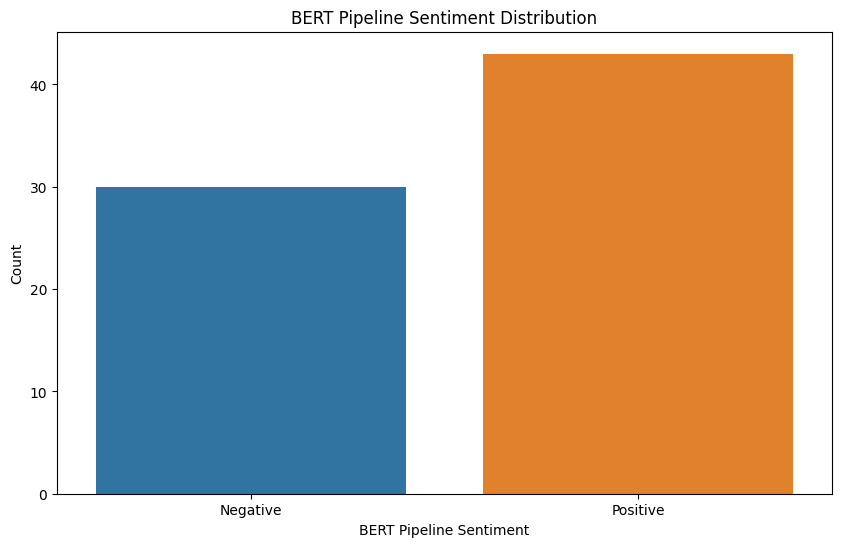

In [35]:
# Plot BERT pipeline sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BERT_Sentiment_Class', order=['Negative', 'Positive'])
plt.title('BERT Pipeline Sentiment Distribution')
plt.xlabel('BERT Pipeline Sentiment')
plt.ylabel('Count')
plt.show()


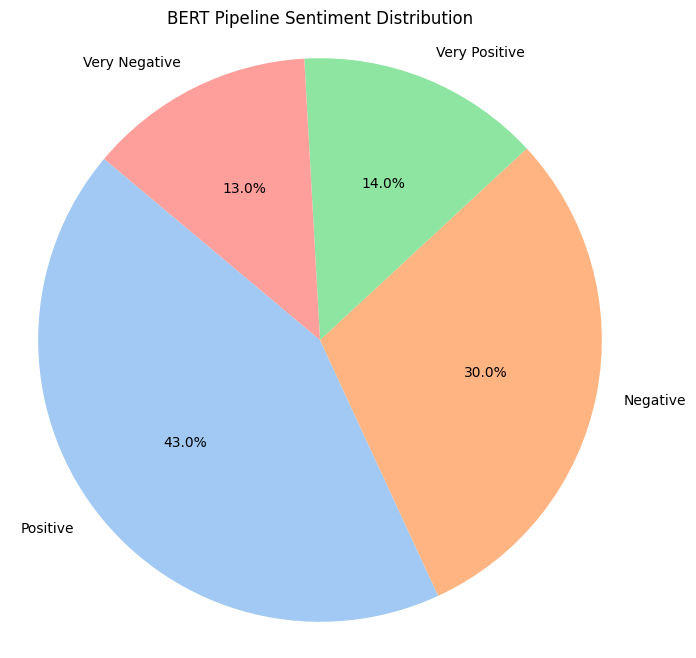

In [37]:
# Plot BERT pipeline sentiment distribution as a pie chart
plot_pie_chart(df, 'BERT_Sentiment_Class', 'BERT Pipeline Sentiment Distribution')


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
# Define function to plot bar chart
def plot_bar_chart(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


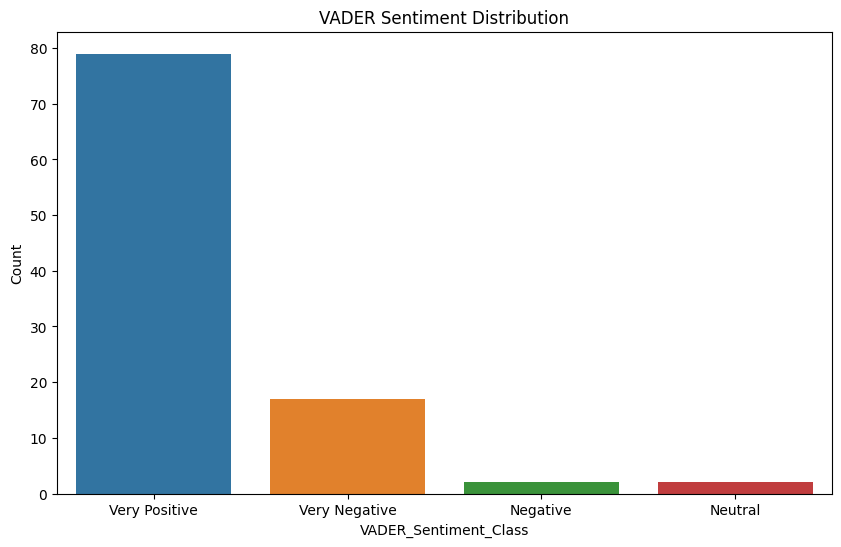

In [40]:
# Plot bar chart for VADER sentiment distribution
plot_bar_chart(df, 'VADER_Sentiment_Class', 'VADER Sentiment Distribution')


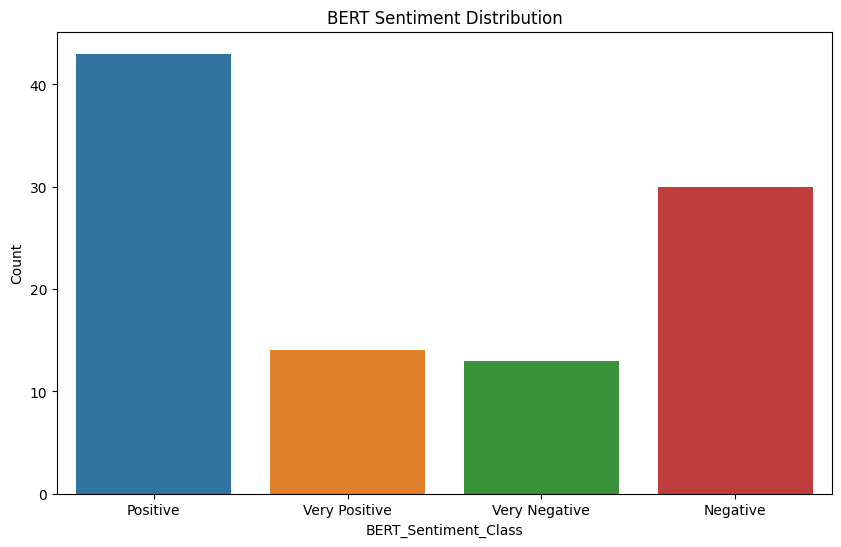

In [41]:
# Plot bar chart for BERT sentiment distribution
plot_bar_chart(df, 'BERT_Sentiment_Class', 'BERT Sentiment Distribution')
